<a href="https://colab.research.google.com/github/ShimaSama/Netflix-QoS/blob/main/google_colab/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import random
import joblib

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
BASE_DIR = '/content/drive/My Drive/MALWIAS/TMA/'

Mounted at /content/drive


In [ ]:
def get_dataset_from_csv(filename):
  file = open(BASE_DIR + filename, 'r')
  hexa_fields = {item: lambda x: int(x, 16) for item in ["tcp.flags", "tcp.checksum", "ip.checksum", "ip.dsfield", "ip.flags", "ip.id"]}
  dataset = pandas.read_csv(file, converters=hexa_fields)
  values = dataset.values
  X = values[:,:len(values[1]) - 1]
  Y = values[:,len(values[1]) - 1]
  return X, Y

X, Y = get_dataset_from_csv('data/computer.csv')
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.3, random_state=random.randint(0, 100000))
X_test, Y_test = get_dataset_from_csv('data/test.csv')

# Create Model

## Loading model

In [ ]:
filename = BASE_DIR + 'models/DecisionTreeClassifier.sav'
model = joblib.load(filename)

## Creating model

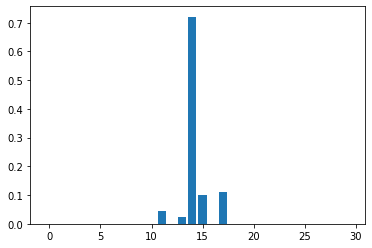

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

## Saving model

In [ ]:
filename = BASE_DIR + 'models/DecisionTreeClassifier.sav'
joblib.dump(model, filename)

['/content/drive/My Drive/MALWIAS/TMA/models/DecisionTreeClassifier.sav']

# Test & Validation

In [ ]:
score = model.score(X_validation, Y_validation)
expected = Y_test
predicted = model.predict(X_test)

print("Model Score: %s" % score)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

Model Score: 0.9938569846641138
              precision    recall  f1-score   support

     netflix       0.11      0.17      0.13      2691
  no_netflix       0.88      0.81      0.84     20120

    accuracy                           0.74     22811
   macro avg       0.49      0.49      0.49     22811
weighted avg       0.79      0.74      0.76     22811

[[  457  2234]
 [ 3809 16311]]


In [ ]:
false_positive = false_negative = true_positive = true_negative = good = 0
for predicted_i, expected_i in zip(predicted, expected):
  if predicted_i == expected_i:
    good += 1
    if predicted_i == "no_netflix":
      true_negative += 1
    else:
      true_positive += 1
  else:
    if predicted_i == "no_netflix":
      false_negative += 1
    else:
      false_positive += 1

print("true positive = " + str(true_positive)+ "---> rate = " + str(true_positive/(true_positive+false_negative)))
print("true negative = " + str(true_negative) + "---> rate = " + str(true_negative/(true_negative+false_positive)))
print("false negative = " + str(false_negative) + "---> rate = " + str(false_negative/(false_negative+true_positive)))
print("false positive = " + str(false_positive) + "---> rate = " + str(false_positive/(false_positive+true_negative)))
print("sensitivity = " + str(true_positive/(true_positive+false_negative)))
print("specifity = " + str(true_negative/(true_negative+false_positive)))
print("acurracy = " + str(good/len(predicted)))

true positive = 457---> rate = 0.16982534373838723
true negative = 16311---> rate = 0.8106858846918489
false negative = 2234---> rate = 0.8301746562616128
false positive = 3809---> rate = 0.1893141153081511
sensitivity = 0.16982534373838723
specifity = 0.8106858846918489
acurracy = 0.7350839507255271
